# Machine Learning Principles

In ths first part we will cover the basics of machine learning; what it is, how it is used in Physics, how it works, and the different approaches one can take depending on the nature of the problem.

## 1. What is Machine Learning?

<font color='red'> TODO: Personnaliser la description </font>

In this section we will begin to explore the basic principles of machine learning.
Machine Learning is about building programs with **tunable parameters** (typically an
array of floating point values) that are adjusted automatically so as to improve
their behavior by **adapting to previously seen data.**

Machine Learning can be considered a subfield of **Artificial Intelligence** since those
algorithms can be seen as building blocks to make computers learn to behave more
intelligently by somehow **generalizing** rather that just storing and retrieving data items
like a database system would do.

We'll take a look at two very simple machine learning tasks here.
The first is a **classification** task: the figure shows a
collection of two-dimensional data, colored according to two different class
labels. A classification algorithm may be used to draw a dividing boundary
between the two clusters of points:

In [2]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-darkgrid")

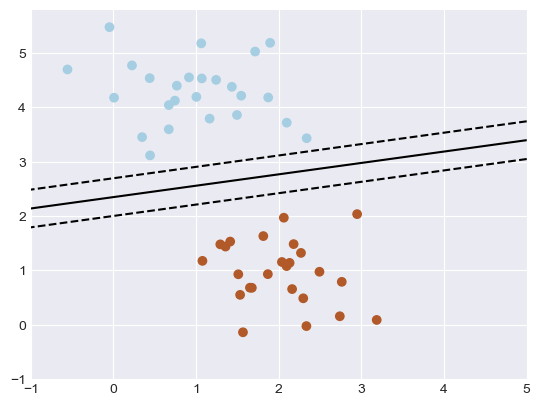

In [3]:
# Import the example plot from the figures directory
from fig_code import plot_sgd_separator
plot_sgd_separator()

### 1.1 Classification
This is typically what we would like to do when building an algorithm able to determine the type of galaxy.

This may seem like a trivial task, but it is a simple version of a very important concept.
By drawing this separating line, we have learned a model which can **generalize** to new
data: if you were to drop another point onto the plane which is unlabeled, this algorithm
could now **predict** whether it's a blue or a red point.

The most common alorithm used for classification are :
- KNN
- DecisionTree
- Support Vector Machine
- ...

We will implement each of them from scratch, for the sake of example.

### 1.2 Regression
The next simple task we'll look at is a **regression** task: a simple best-fit line
to a set of data:
Previously we saw a powerful discriminative classifier, **Support Vector Machines**.
Here we'll take a look at motivating another powerful algorithm. This one is a *non-parametric* algorithm called **Random Forests**.
#### Motivating Random Forests: Decision Trees
Random forests are an example of an *ensemble learner* built on decision trees.
For this reason we'll start by discussing decision trees themselves.

Decision trees are extremely intuitive ways to classify or label objects: you simply ask a series of questions designed to zero-in on the classification:
The binary splitting makes this extremely efficient.
As always, though, the trick is to *ask the right questions*.
This is where the algorithmic process comes in: in training a decision tree classifier, the algorithm looks at the features and decides which questions (or "splits") contain the most information.

#### Creating a Decision Tree

Here's an example of a decision tree classifier in scikit-learn. We'll start by defining some two-dimensional labeled data:

Notice that at each increase in depth, every node is split in two **except** those nodes which contain only a single class.
The result is a very fast **non-parametric** classification, and can be extremely useful in practice.

**Question: Do you see any problems with this?**

The details of the classifications are completely different! That is an indication of **over-fitting**: when you predict the value for a new point, the result is more reflective of the noise in the model rather than the signal.

#### Ensembles of Estimators: Random Forests

One possible way to address over-fitting is to use an **Ensemble Method**: this is a meta-estimator which essentially averages the results of many individual estimators which over-fit the data. Somewhat surprisingly, the resulting estimates are much more robust and accurate than the individual estimates which make them up!

One of the most common ensemble methods is the **Random Forest**, in which the ensemble is made up of many decision trees which are in some way perturbed.

There are volumes of theory and precedent about how to randomize these trees, but as an example, let's imagine an ensemble of estimators fit on subsets of the data. We can get an idea of what these might look like as follows:

See how the details of the model change as a function of the sample, while the larger characteristics remain the same!
The random forest classifier will do something similar to this, but use a combined version of all these trees to arrive at a final answer:

By averaging over 100 randomly perturbed models, we end up with an overall model which is a much better fit to our data!

*(Note: above we randomized the model through sub-sampling... Random Forests use more sophisticated means of randomization, which you can read about in, e.g. the [scikit-learn documentation](http://scikit-learn.org/stable/modules/ensemble.html#forest)*)

#### Quick Example: Moving to Regression

Above we were considering random forests within the context of classification.
Random forests can also be made to work in the case of regression (that is, continuous rather than categorical variables). The estimator to use for this is ```sklearn.ensemble.RandomForestRegressor```

Let's quickly demonstrate how this can be used:

As you can see, the non-parametric random forest model is flexible enough to fit the multi-period data, without us even specifying a multi-period model!

To remind us what we're looking at, we'll visualize the first few data points:

We can quickly classify the digits using a decision tree as follows:

We can check the accuracy of this classifier:
and for good measure, plot the confusion matrix:

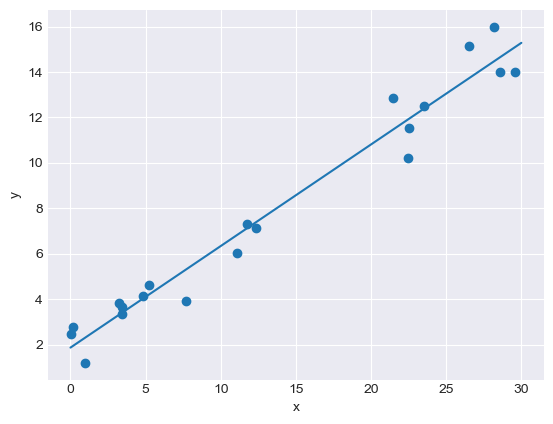

In [4]:
from fig_code import plot_linear_regression
plot_linear_regression()

Again, this is an example of fitting a model to data, such that the model can make
generalizations about new data.  The model has been **learned** from the training
data, and can be used to predict the result of test data:
here, we might be given an x-value, and the model would
allow us to predict the y value.  Again, this might seem like a trivial problem,
but it is a basic example of a type of operation that is fundamental to
machine learning tasks.

## 2. Presentation of the Dataset

Machine learning is about creating models from data: for that reason, we'll start by
discussing how data can be represented in order to be understood by the computer.  Along
with this, we'll build on our matplotlib examples from the previous section and show some
examples of how to visualize data.

We wrap our galaxy dataset in a sklearn-like Python class in order to maintain the usual workflow one might has with the sklearn API. 

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a
**two-dimensional array or matrix**.  The arrays can be
either ``numpy`` arrays, or in some cases ``scipy.sparse`` matrices.
The size of the array is expected to be `[n_samples, n_features]`

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than numpy arrays.

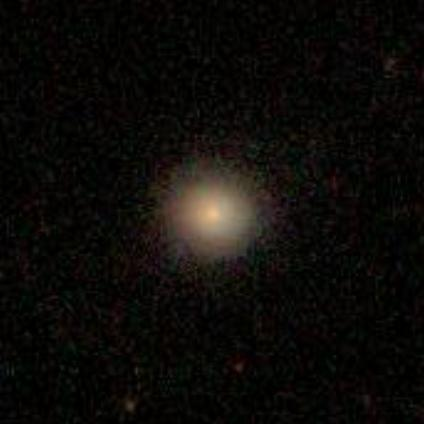

Elliptical Galaxy



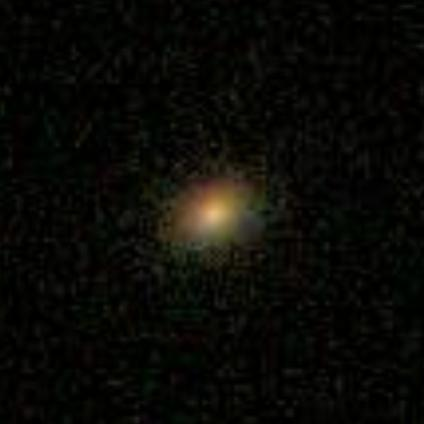

Spiral Galaxy



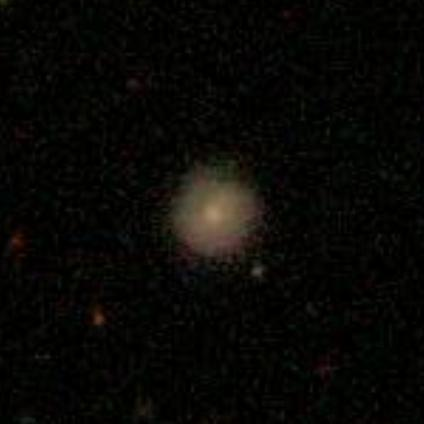

Uncertain Type of Galaxy


In [5]:
from IPython.display import Image, display
display(Image(filename='../images/280236.jpg'))
print("Elliptical Galaxy\n")

display(Image(filename='../images/294275.jpg'))
print("Spiral Galaxy\n")

display(Image(filename='../images/280235.jpg'))
print("Uncertain Type of Galaxy")

### Quick Question:

**If we want to design an algorithm to recognize iris species, what might the data be?**

Remember: we need a 2D array of size `[n_samples x n_features]`.

- What would the `n_samples` refer to?

- What might the `n_features` refer to?

Remember that there must be a **fixed** number of features for each sample, and feature
number ``i`` must be a similar kind of quantity for each sample.

### Loading the Galaxy Dataset

The data consist of the following:

- Features in the Galaxy Zoo dataset:  
  1. 
  2.
  3.

- Target classes to predict:
  1. Spiral
  2. Elliptical
  3. Uncertain


In [6]:
from lblearn.datasets import load_galaxies

In [7]:
galaxies = load_galaxies(n_samples=50)
galaxies.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
n_samples, n_features = galaxies.data.shape
print((n_samples, n_features))
print(galaxies.data[0])

(150, 10)
[6.00e+01 2.00e-01 5.00e-02 2.17e-01 5.33e-01 0.00e+00 0.00e+00 8.00e-01
 2.00e-01 8.00e-01]


In [9]:
print(galaxies.data.shape)
print(galaxies.target.shape)

(150, 10)
(150,)


In [10]:
print(galaxies.target[:150])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [11]:
print(galaxies.target_names)

['SPIRAL', 'ELLIPTICAL', 'UNCERTAIN']


This data is **ten** dimensional, but we can visualize two of the dimensions
at a time using a simple scatter-plot:

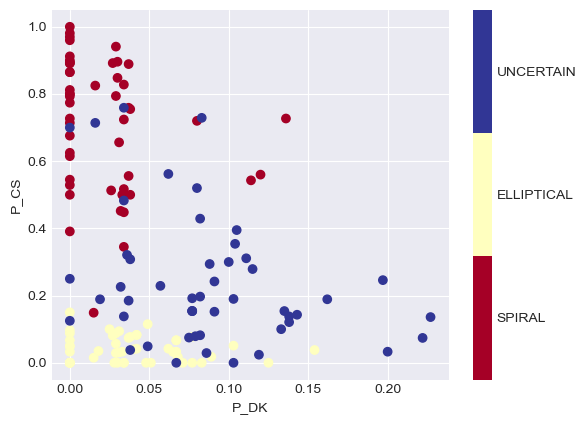

In [25]:
import numpy as np
import matplotlib.pyplot as plt

x_index = 5
y_index = 7
# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: galaxies.target_names[int(i)])

plt.scatter(galaxies.data[:, x_index], galaxies.data[:, y_index],
            c=galaxies.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(galaxies.feature_names[x_index])
plt.ylabel(galaxies.feature_names[y_index]);

### Quick Exercise:

**Change** `x_index` **and** `y_index` **in the above script
and find a combination of two parameters
which maximally separate the three classes.**

This exercise is a preview of **dimensionality reduction**, which we'll see later.